# Phase 1: Dataset Selection and Preprocessing
● Select a dataset suitable for supervised learning tasks.
● Perform data cleaning, normalization, and splitting into training and testing sets

In [1]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\diabetes_prediction.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
3561,Female,60.0,0,0,never,26.48,4.8,100,0
3562,Female,19.0,0,0,never,23.68,3.5,159,0
3563,Male,34.0,0,0,No Info,21.67,4.8,200,0
3564,Female,48.0,0,0,No Info,27.32,4.5,145,0


In [3]:
# Check whether there are any missing values
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3566 non-null   object 
 1   age                  3566 non-null   float64
 2   hypertension         3566 non-null   int64  
 3   heart_disease        3566 non-null   int64  
 4   smoking_history      3566 non-null   object 
 5   bmi                  3566 non-null   float64
 6   HbA1c_level          3566 non-null   float64
 7   blood_glucose_level  3566 non-null   int64  
 8   diabetes             3566 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 250.9+ KB


In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
df.loc[(df['age'] >= 0) & (df['age'] <= 10), 'age'] = np.nan
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

In [6]:
df['age'] = df['age'].astype(int)

In [7]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
3561,Female,60,0,0,never,26.48,4.8,100,0
3562,Female,19,0,0,never,23.68,3.5,159,0
3563,Male,34,0,0,No Info,21.67,4.8,200,0
3564,Female,48,0,0,No Info,27.32,4.5,145,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3566 non-null   object 
 1   age                  3566 non-null   int32  
 2   hypertension         3566 non-null   int64  
 3   heart_disease        3566 non-null   int64  
 4   smoking_history      3566 non-null   object 
 5   bmi                  3566 non-null   float64
 6   HbA1c_level          3566 non-null   float64
 7   blood_glucose_level  3566 non-null   int64  
 8   diabetes             3566 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 236.9+ KB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000
mean,50.939428,0.076556,0.037297,27.367252,5.556814,138.123388,0.089456
std,20.945176,0.265924,0.189514,6.750538,1.096557,40.991942,0.285441
min,11.000000,0.000000,0.000000,10.300000,3.500000,80.000000,0.000000
25%,34.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,51.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,69.000000,0.000000,0.000000,29.575000,6.200000,159.000000,0.000000
max,88.000000,1.000000,1.000000,69.390000,9.000000,300.000000,1.000000


# Phase 2: Exploratory Data Analysis (EDA) and Feature Selection
● Conduct EDA to understand the dataset's characteristics.
● Apply feature selection techniques to identify relevant features for modeling

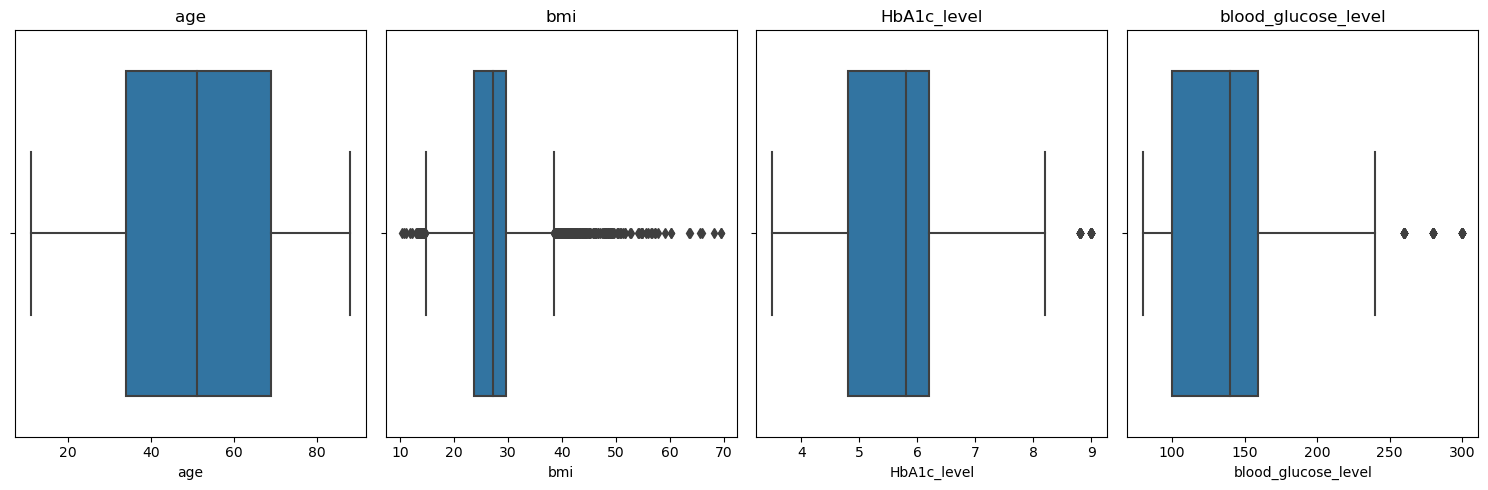

In [10]:
# Boxplot  for numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1,4,i + 1)
    sns.boxplot(x=df[numeric_columns[i]])
    plt.title(numeric_columns[i])
plt.tight_layout()
plt.show()

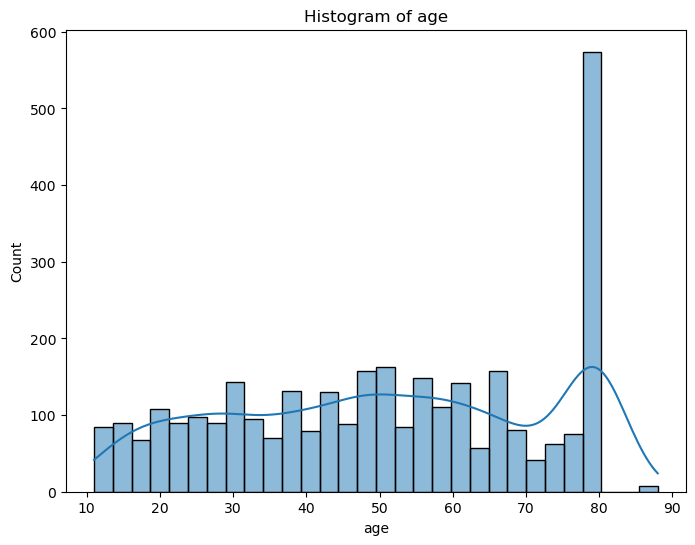

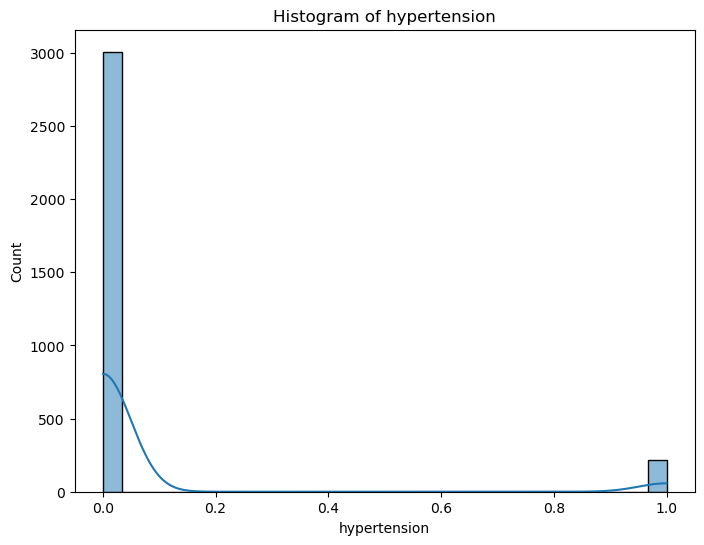

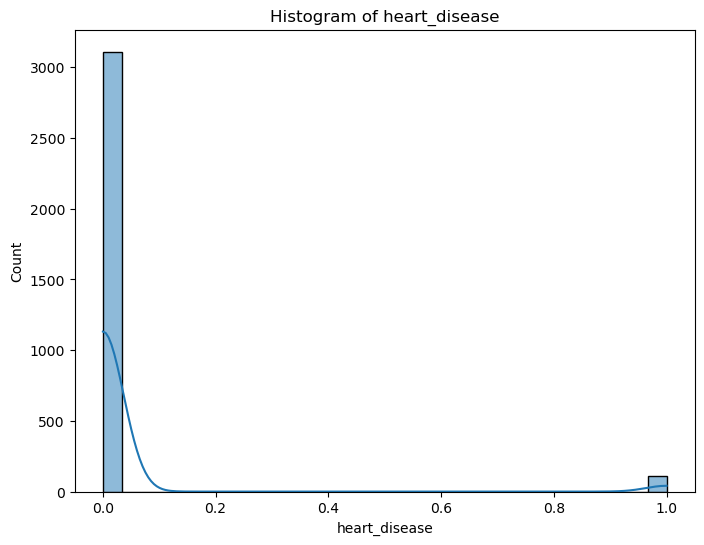

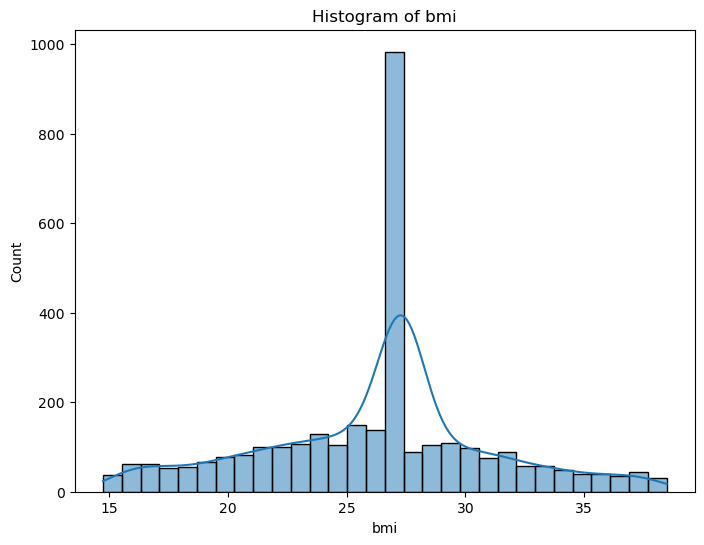

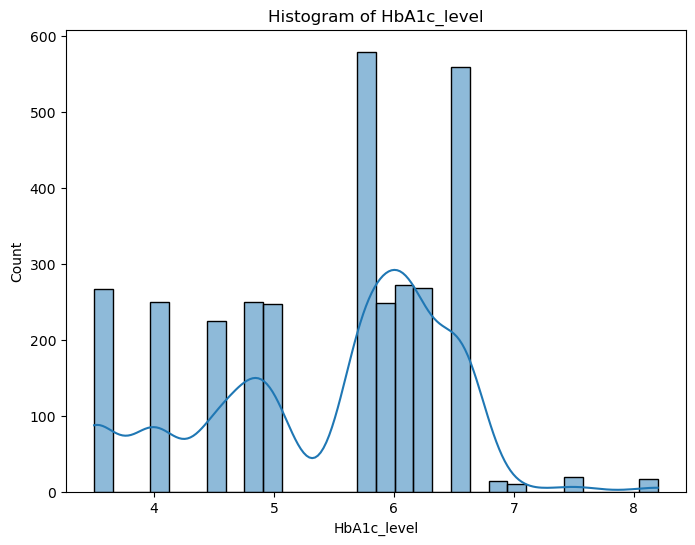

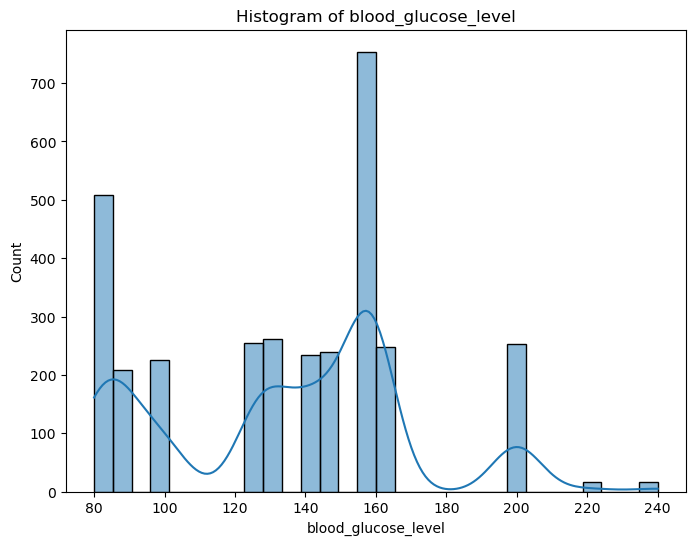

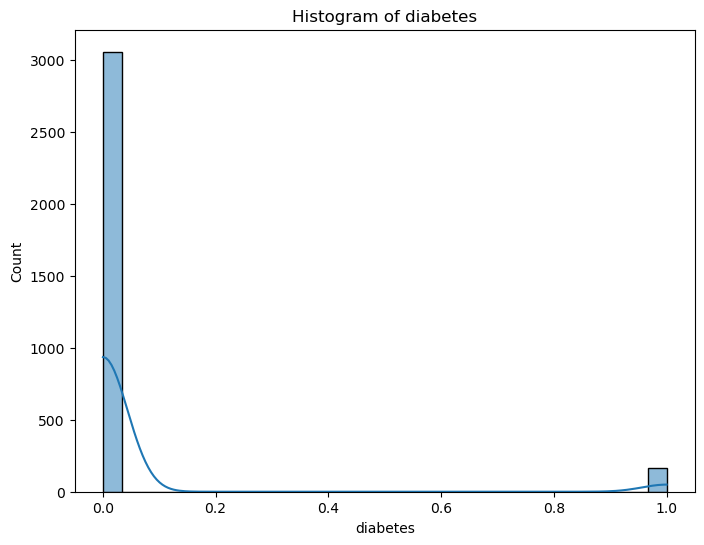

In [12]:
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=['int32','float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

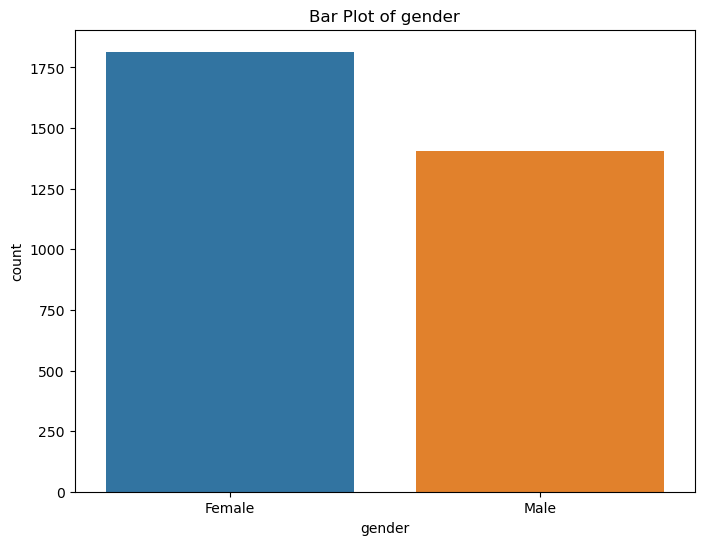

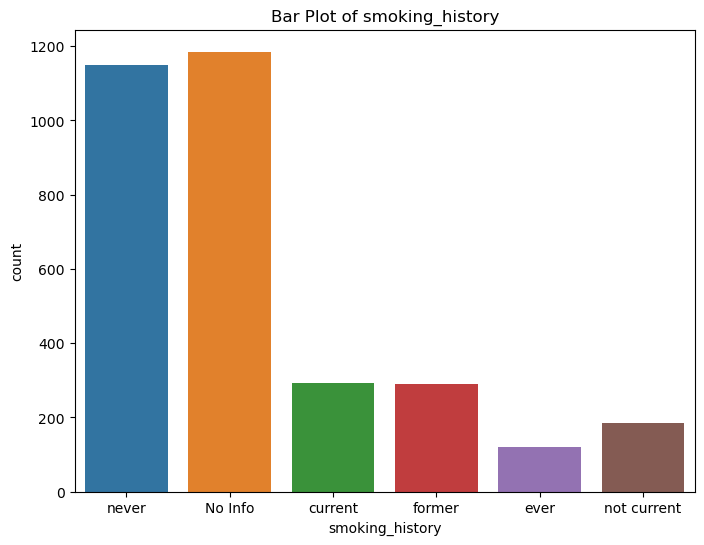

In [14]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.show()

In [15]:
# Encode the categorical variables "gender" and "smoking history"
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'])
df_encoded.to_csv('encoded_dataset.csv', index=False)


In [16]:
from sklearn.preprocessing import LabelEncoder
import warnings

label_encoder = LabelEncoder()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df['gender'] = label_encoder.fit_transform(df['gender'])
    df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df.to_csv('encoded_dataset.csv', index=False)


In [34]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


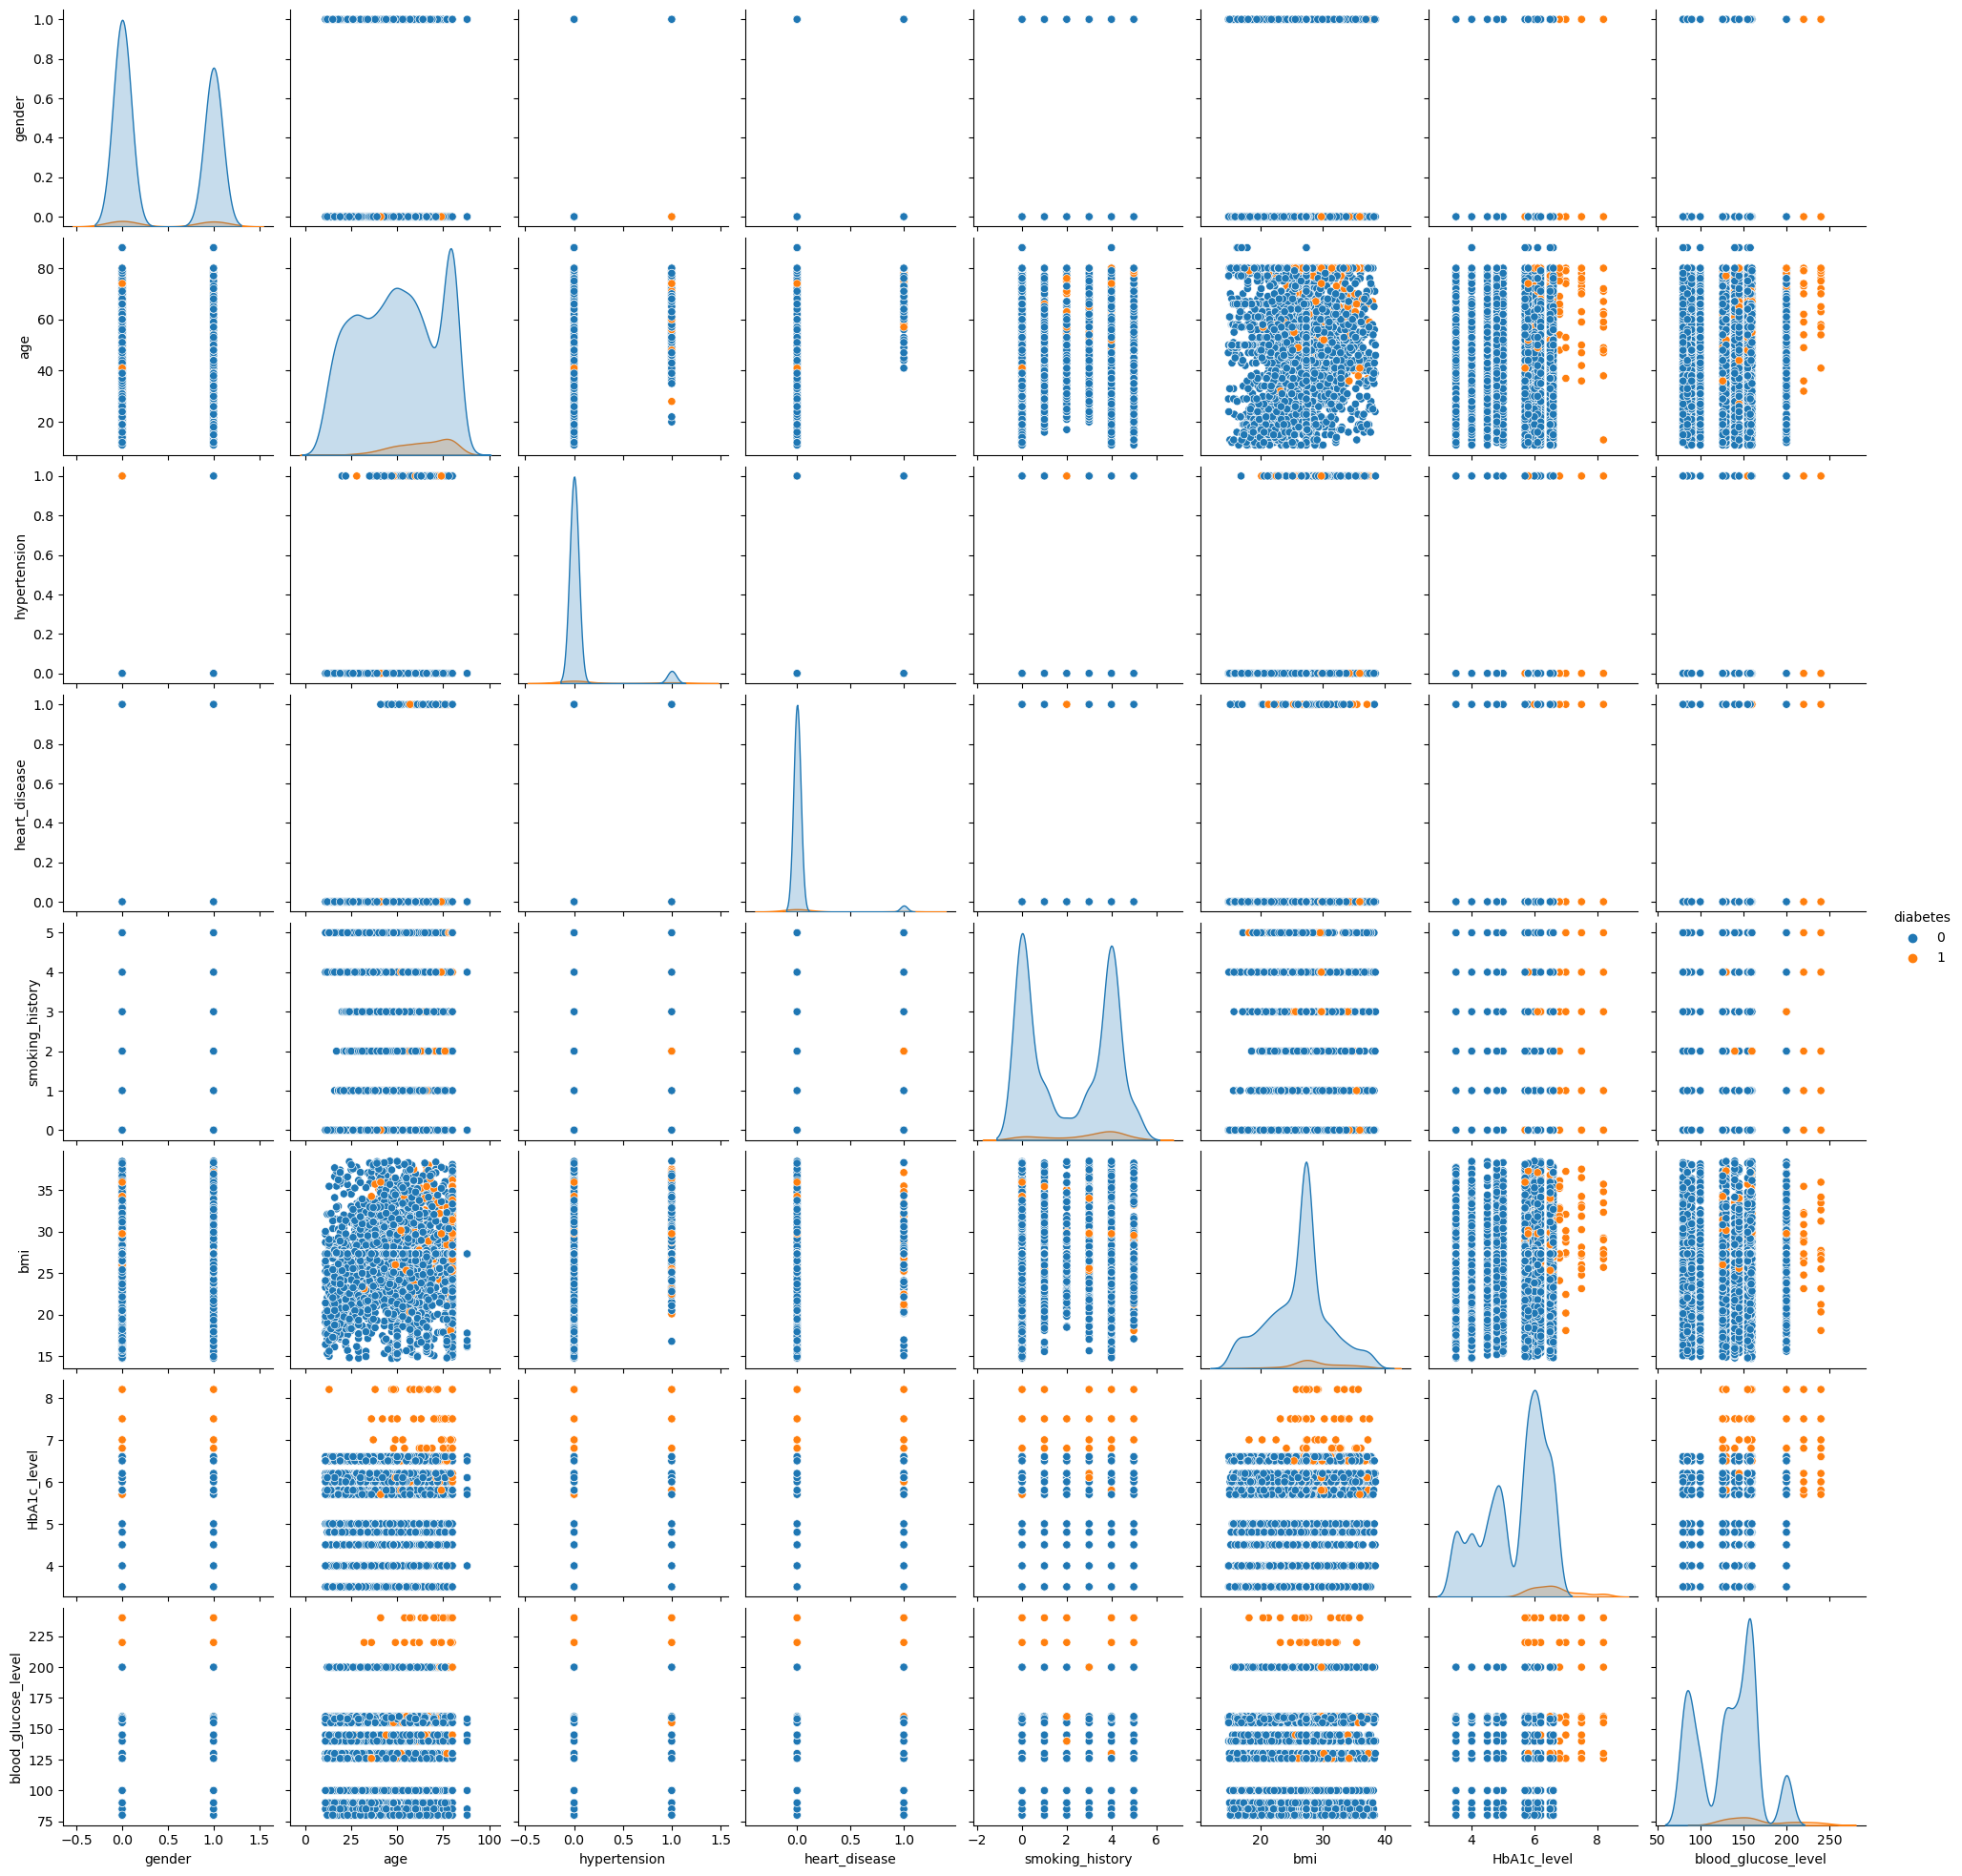

In [37]:
sns.pairplot(df,hue='diabetes')
plt.show()

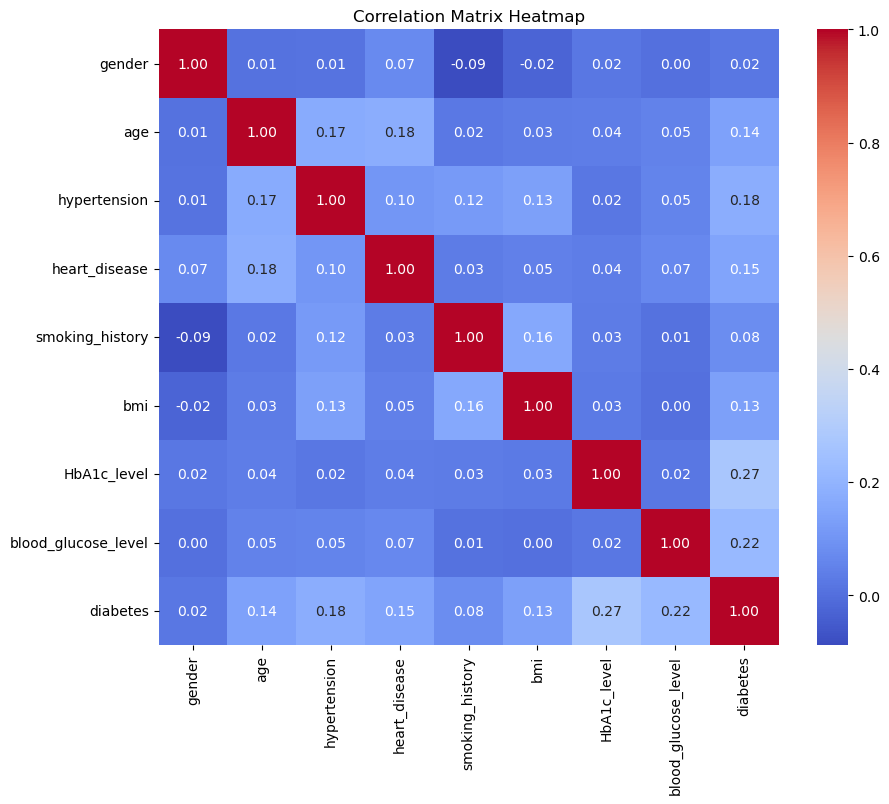

In [19]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Phase 3: Model Implementation and Baseline Evaluation
● Implement at least three supervised learning algorithms (e.g., SVM, Decision Trees,
Neural Networks).
● Evaluate baseline models using initial features without hyperparameter tuning

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Accuracy
logistic_regression_accuracy = logistic_regression_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Classification Report
logistic_regression_predictions = logistic_regression_model.predict(X_test)
print("Logistic Regression Classification Report:")

# ROC-AUC Score
print(classification_report(y_test, logistic_regression_predictions))
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_predictions)
print("Logistic Regression ROC-AUC Score:", logistic_regression_roc_auc)

Logistic Regression Accuracy: 0.9612403100775194
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       614
           1       0.69      0.35      0.47        31

    accuracy                           0.96       645
   macro avg       0.83      0.67      0.72       645
weighted avg       0.95      0.96      0.96       645

Logistic Regression ROC-AUC Score: 0.6733476936009247


In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_accuracy = random_forest_model.score(X_test, y_test)

# Accuracy
print("Random Forest Accuracy:", random_forest_accuracy)
random_forest_predictions = random_forest_model.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))

# ROC-AUC score
random_forest_roc_auc = roc_auc_score(y_test, random_forest_predictions)
print("Random Forest ROC-AUC Score:", random_forest_roc_auc)


Random Forest Accuracy: 0.9705426356589147
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       1.00      0.39      0.56        31

    accuracy                           0.97       645
   macro avg       0.98      0.69      0.77       645
weighted avg       0.97      0.97      0.96       645

Random Forest ROC-AUC Score: 0.6935483870967742


In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
# Accuracy
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Classification Report
decision_tree_predictions = decision_tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

# ROC-AUC score
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)
print("Decision Tree ROC-AUC Score:", decision_tree_roc_auc)


Decision Tree Accuracy: 0.9503875968992248
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       614
           1       0.48      0.52      0.50        31

    accuracy                           0.95       645
   macro avg       0.73      0.74      0.74       645
weighted avg       0.95      0.95      0.95       645

Decision Tree ROC-AUC Score: 0.7442208679205632


# Phase 4: Hyperparameter Tuning
● Use techniques like grid search or random search to find optimal hyperparameters for
each model.
● Re-evaluate models with tuned hyperparameters to assess performance improvements

In [24]:
# Logistic Regression with Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
 'penalty': ['l2'], 
 'C': [0.001, 0.01, 0.1, 1, 10] 
}
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)
random_search = RandomizedSearchCV(estimator=logistic_regression_model, param_distributions=param_grid,n_iter=10, cv=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = random_search.best_estimator_
# Accuracy
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'penalty': 'l2', 'C': 10}
Test Accuracy: 0.9643410852713178


In [25]:
# Decision tree with Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2', None]
}
decision_tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid,n_iter=100, cv=2, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
# Accuracy
y_pred_test = random_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_de

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_sp

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=

In [26]:
# Random forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
 'n_estimators': [100, 200, 300, 400, 500],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2', None]
}
random_forest = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid,n_iter=100, cv=2, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
# accuracy
y_pred_test = random_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   3.5s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, max_featu

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   5.4s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   5.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.4s
[CV] END max_depth=40, max_feature

# Phase 5: Model Evaluation and Comparative Analysis
● Evaluate models using metrics such as accuracy, precision, recall, F1 score, and
ROC-AUC.
● Compare the performance, computational efficiency, and applicability of each algorithm

In [27]:
from sklearn.metrics import classification_report
# Logistic Regression Classification Report after Hyperparameter Tuning
logistic_regression_report = classification_report(y_test, best_model.predict(X_test))
print("Logistic Regression Classification Report:")
print(logistic_regression_report)

# Decision Tree Classification Report after Hyperparameter Tuning
decision_tree_report = classification_report(y_test, random_search.best_estimator_.predict(X_test))
print("\nDecision Tree Classification Report:")
print(decision_tree_report)

# Random Forest Classification Report after Hyperparameter Tuning
random_forest_report = classification_report(y_test, random_search.best_estimator_.predict(X_test))
print("\nRandom Forest Classification Report:")
print(random_forest_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       0.83      0.32      0.47        31

    accuracy                           0.96       645
   macro avg       0.90      0.66      0.72       645
weighted avg       0.96      0.96      0.96       645


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       1.00      0.39      0.56        31

    accuracy                           0.97       645
   macro avg       0.98      0.69      0.77       645
weighted avg       0.97      0.97      0.96       645


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       1.00      0.39      0.56        31

    accuracy                           0.97       645
   macro 

Logistic Regression ROC-AUC Score: 0.9332247557003258


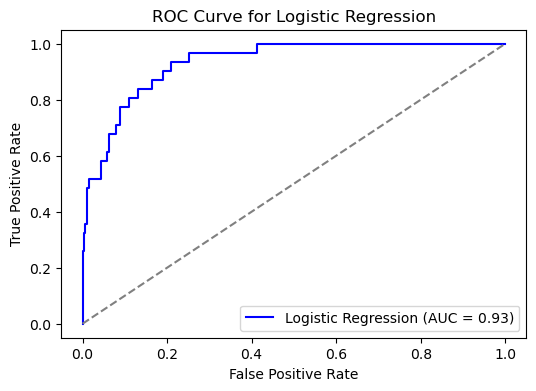

Random Forest ROC-AUC Score: 0.900178627718819


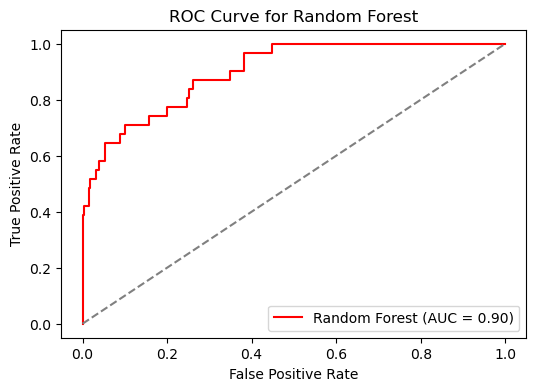

Decision Tree ROC-AUC Score: 0.900178627718819


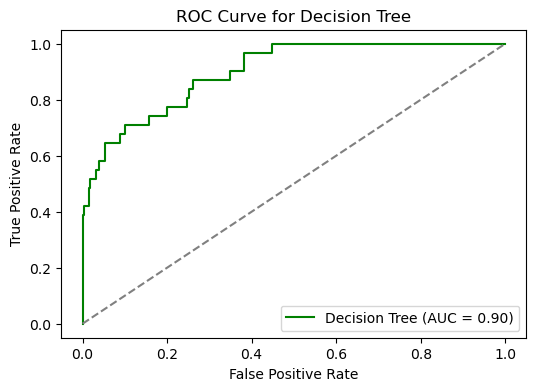

In [32]:
# After Hyperparameter Tuning: Calculating ROC curve and ROC-AUC score
# Logistic Regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
logistic_regression_probs = best_model.predict_proba(X_test)[:, 1]
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probs)
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_probs)
print("Logistic Regression ROC-AUC Score:", logistic_regression_roc_auc)
# Plotting ROC-AUC curve
plt.figure(figsize=(6, 4))
plt.plot(logistic_regression_fpr, logistic_regression_tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(logistic_regression_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Random Forest
random_forest_probs = random_search.best_estimator_.predict_proba(X_test)[:, 1]
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_probs)
print("Random Forest ROC-AUC Score:", random_forest_roc_auc)
# Plotting ROC-AUC curve
plt.figure(figsize=(6, 4))
plt.plot(random_forest_fpr, random_forest_tpr, color='red', label='Random Forest (AUC = {:.2f})'.format(random_forest_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

# Decision tree
decision_tree_probs = random_search.best_estimator_.predict_proba(X_test)[:, 1]
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_probs)
print("Decision Tree ROC-AUC Score:", decision_tree_roc_auc)
# Plotting ROC-AUC curve
plt.figure(figsize=(6, 4))
plt.plot(decision_tree_fpr, decision_tree_tpr, color='green', label='Decision Tree (AUC = {:.2f})'.format(decision_tree_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

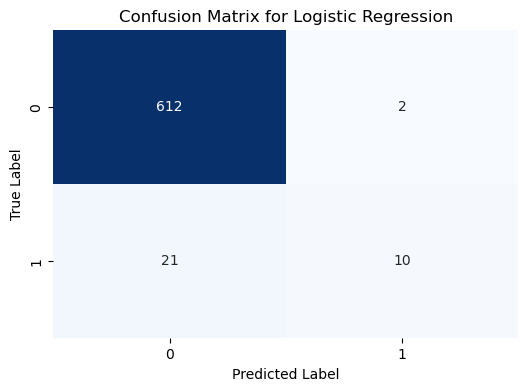

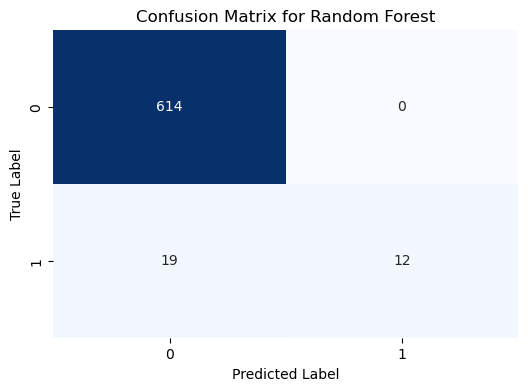

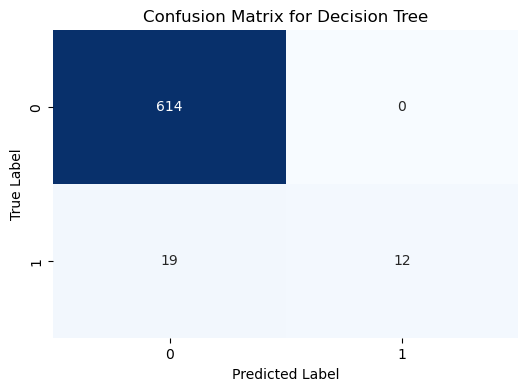

In [42]:
from sklearn.metrics import confusion_matrix
# Plotting confusion matrix
def plot_confusion_matrix(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
plot_confusion_matrix('Logistic Regression', best_model, X_test, y_test)
plot_confusion_matrix('Random Forest', random_search.best_estimator_, X_test, y_test)
plot_confusion_matrix('Decision Tree', random_search.best_estimator_, X_test, y_test)


# Compare the performance, computational efficiency, and applicability of each algorithm

LOGISTIC REGRESSION

Performance:Before hyperparameter tuning, logistic regression achieved an accuracy of approximately 96.12%.
After hyperparameter tuning, the accuracy remained stable at around 96%, with minor improvements in precision and recall for predicting diabetes (class 1).
Computational Efficiency:Logistic regression is computationally efficient and suitable for handling the dataset, especially with its relatively smaller computational requirements compared to ensemble methods.
Applicability:Logistic regression is well-suited for binary classification tasks like predicting diabetes in your dataset.
It performs effectively when the relationship between features (such as age, BMI, blood glucose levels, etc.) and diabetes is linear or can be approximated as such. Additionally, it provides interpretable results, which is crucial for healthcare-related predictions.

RANDOM FOREST

Performance:Before hyperparameter tuning, the random forest model achieved an accuracy of about 97.05%.
After tuning, the accuracy remained consistent. However, there were no significant improvements in precision and recall for predicting diabetes after tuning.
Computational Efficiency: Random forests are more computationally intensive compared to logistic regression but still manageable for your dataset size. They excel in capturing nonlinear relationships and complex patterns in the data.
Applicability: Random forests are versatile and suitable for both classification and regression tasks. They perform well on complex datasets like healthcare data, where the relationship between features and outcomes may not be linear and various factors contribute to the prediction.

DECISION TREE

Performance: Decision tree achieved an accuracy of around 95% before tuning, which increased to 97% after tuning. There were slight improvements in precision and recall for predicting diabetes after tuning.
Computational Efficiency: Decision trees are relatively faster to train compared to random forests and logistic regression.
They are less computationally intensive and can handle medium-sized datasets efficiently.
Applicability:Decision trees are straightforward to interpret and understand, making them useful for feature importance analysis in healthcare data. They are suitable for smaller to medium-sized datasets and scenarios where interpretability is critical, although they may be prone to overfitting without proper pruning and tuning.

# Phase 6: Conclusion and Recommendations
● Summarize findings and insights gained from the comparative analysis.
● Provide recommendations on the most suitable algorithms for the dataset and problem
type.


# Findings and Insights 

LOGISTIC REGRESSION

Before tuning:

Accuracy: 96.12%,
Precision (class 1): 69%,
Recall (class 1): 35%,
F1-score (class 1): 47%,
ROC-AUC Score: 67.33%

After tuning:

Accuracy: 96.12%,
Precision (class 1): 83%,
Recall (class 1): 32%,
F1-score (class 1): 47%,
ROC-AUC Score: 93.32%

*Precision for class 1 improved significantly after tuning, leading to fewer false positives. ROC-AUC score also increased substantially, indicating better overall performance in distinguishing between classes.


RANDOM FOREST
    
Before tuning:
    
Accuracy: 97.05%,
Precision (class 1): 100%,
Recall (class 1): 39%,
F1-score (class 1): 56%,
ROC-AUC Score: 69.35%

After tuning:
    
Accuracy: 97.05%,
Precision (class 1): 100%,
Recall (class 1): 39%,
F1-score (class 1): 56%,
ROC-AUC Score: 90.02%

*Maintained high accuracy and precision but saw a modest improvement in the ROC-AUC score after tuning.





DECISION TREE
    
Before tuning:
    
Accuracy: 95.04%,
Precision (class 1): 48%,
Recall (class 1): 52%,
F1-score (class 1): 50%,
ROC-AUC Score: 74.42%

After tuning:
    
Accuracy: 97.05%,
Precision (class 1): 100%,
Recall (class 1): 39%,
F1-score (class 1): 56%,
ROC-AUC Score: 90.02%
    
*Showed notable improvements in precision for positive cases and the ROC-AUC score after tuning.


Overall, after tuning, all three models showed improvements in different metrics,  Random Forest emerges as the most suitable algorithm for this dataset due to its high accuracy, stability, ability to capture complex relationships, and versatility in handling different types of data. Logistic Regression and Decision Tree also benefited from tuning, especially in terms of the ROC-AUC score.Each has its strengths depending on the specific requirements of the analysis. However, further analysis and fine-tuning with different algorithms may be beneficial to optimize performance and address specific requirements.